In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms,models
import numpy as np
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
from sklearn import metrics

In [3]:
transform = transforms.Compose([
    #transforms.Grayscale(),
    transforms.ToTensor(),
])

traindataset = datasets.STL10('./downloads/', download=True, split='train', transform=transform)
testdataset = datasets.STL10('./downloads/', download=True, split='test', transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
print(f'traindataset =>{traindataset.data.shape}')
print(f'testdataset =>{testdataset.data.shape}')

traindataset =>(5000, 3, 96, 96)
testdataset =>(8000, 3, 96, 96)


In [5]:

trainloader = torch.utils.data.DataLoader(traindataset, batch_size=100, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=1000, shuffle=False, num_workers=4)

torch.Size([1000, 3, 96, 96])


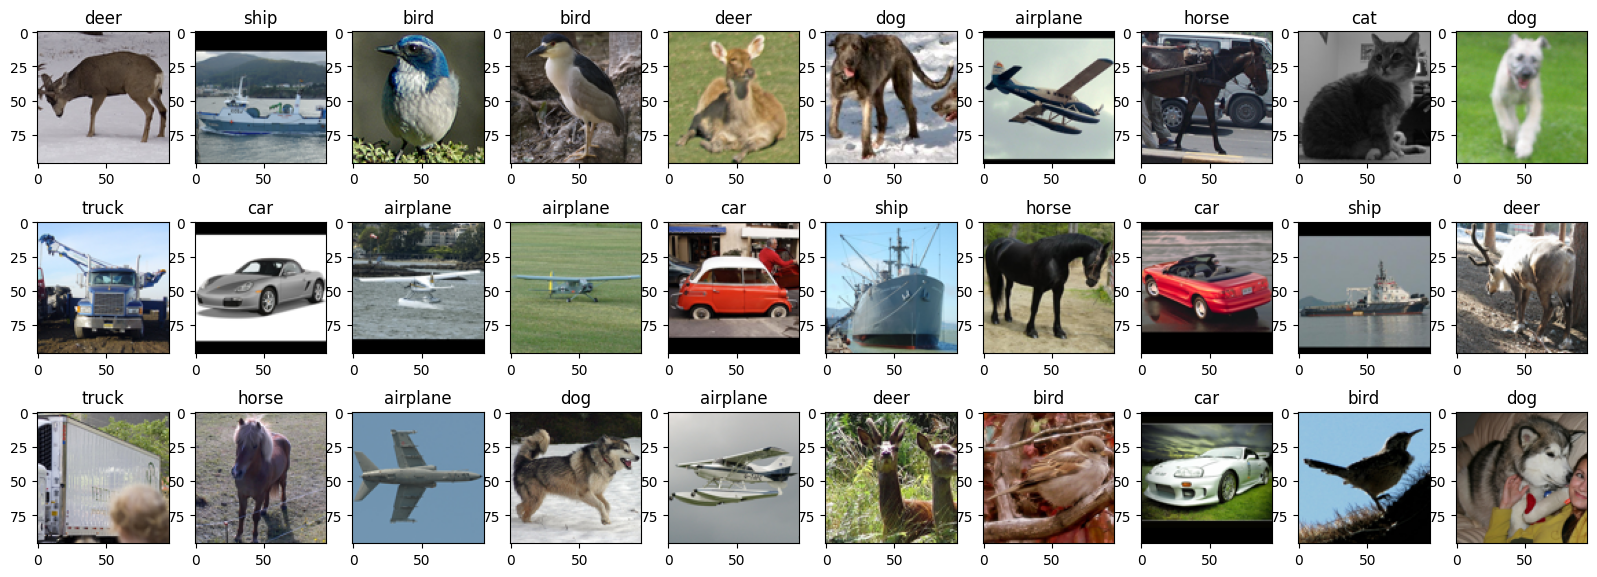

In [6]:
def view_samples():
    
    test_images, labels = next(iter(testloader))
    print(test_images.shape)
    fig = plt.figure(figsize =(20,7))
    nrows = 3
    ncols = 10
    b=np.random.randint(0,test_images.shape[0]-nrows*ncols)
    for i in range(nrows*ncols):
        plot = fig.add_subplot(nrows, ncols, i+1)
        plot.set_title(testdataset.classes[labels[i+b].cpu().numpy()])
        plot.imshow(np.transpose(test_images[i+b], (1, 2, 0)).cpu())
    plt.show()
view_samples()

In [7]:
def plot_training_graphs(loss_list):
    fig = plt.figure(figsize =(20,7))
    plot = fig.add_subplot(1, 2, 1)
    plot.set_title("Training vs Validation loss")
    plot.plot(loss_list[:,0], linestyle='--', label="Training Loss")
    plot.plot(loss_list[:,1], linestyle='-', label="Validation Loss" )
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Loss")
    plot.legend()
    plot = fig.add_subplot(1, 2, 2)
    plot.set_title("Training vs Validation Accuracy")
    plot.plot(loss_list[:,2], linestyle='--', label="Training Accuracy")
    plot.plot(loss_list[:,3], linestyle='-', label="Validation Accuracy" )
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Accuracy")
    plot.legend()
    plt.show()

In [8]:
# Train the model
def model_training(model,criterion,optimizer,trainloader,testloader,num_epochs = 10):
    loss_list = []
    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0
        train_acc = 0.0
        val_acc = 0.0
        for images, labels in trainloader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()*images.size(0)
            train_acc += metrics.accuracy_score(labels,outputs.argmax(axis=1))
        # Evaluate the model on the validation set
        with torch.no_grad():
            images, labels = next(iter(testloader))
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()*images.size(0)
            val_acc += metrics.accuracy_score(labels,outputs.argmax(axis=1))
        train_loss = train_loss/len(trainloader)
        #val_loss = val_loss/len(testloader)
        train_acc = train_acc/len(trainloader)
        #val_acc = val_acc/len(testloader)
        print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss:.6f}, \tTest Loss: {val_loss:.6f},  \tTraining acc: {train_acc:.6f}, \tTest acc: {val_acc:.6f}, ')
        loss_list.append([train_loss,val_loss,train_acc,val_acc])
    
    
    return np.array(loss_list)


In [31]:
from sklearn import metrics
import seaborn as sns
#sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

def confusionMatrixAndAccuracyReport(Y_test, Y_pred_probs, label):
    Y_pred = Y_pred_probs.argmax(axis=1)
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = metrics.accuracy_score(Y_test, Y_pred)

    classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)

    top_5_accuracy = metrics.top_k_accuracy_score(Y_test,Y_pred_probs,k=5,labels=np.arange(10))

    plt.figure(figsize=(10, 10))
    plt.title(f'Top 1 Accuracy : {overallAccuracy*100:3.2f}% | Top 5 Accuracy : {top_5_accuracy*100:3.2f}% ', size=14)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues', fmt='g')

    plt.show()
    print(f'Top 1 Accuracy: {overallAccuracy*100:3.3f}%')
    print(f'Top 5 Accuracy: {top_5_accuracy*100}%')
    print(f'Classwise Accuracy Score: \n{classwiseAccuracy}')

Selected optimizer :<class 'torch.optim.adam.Adam'>
Epoch: 1 	Training Loss: 82.078650, 	Test Loss: 614.433289,  	Training acc: 0.727000, 	Test acc: 0.793000, 
Epoch: 2 	Training Loss: 31.350838, 	Test Loss: 657.145262,  	Training acc: 0.894600, 	Test acc: 0.796000, 
Epoch: 3 	Training Loss: 19.408739, 	Test Loss: 673.955321,  	Training acc: 0.934800, 	Test acc: 0.793000, 
Epoch: 4 	Training Loss: 21.767490, 	Test Loss: 700.918734,  	Training acc: 0.932200, 	Test acc: 0.791000, 
Epoch: 5 	Training Loss: 11.681993, 	Test Loss: 709.099174,  	Training acc: 0.961400, 	Test acc: 0.815000, 
Epoch: 6 	Training Loss: 7.955046, 	Test Loss: 718.438625,  	Training acc: 0.973800, 	Test acc: 0.820000, 
Epoch: 7 	Training Loss: 10.227830, 	Test Loss: 755.967617,  	Training acc: 0.968200, 	Test acc: 0.813000, 
Epoch: 8 	Training Loss: 9.303071, 	Test Loss: 760.519803,  	Training acc: 0.968200, 	Test acc: 0.819000, 
Epoch: 9 	Training Loss: 9.134530, 	Test Loss: 800.109386,  	Training acc: 0.971200, 	

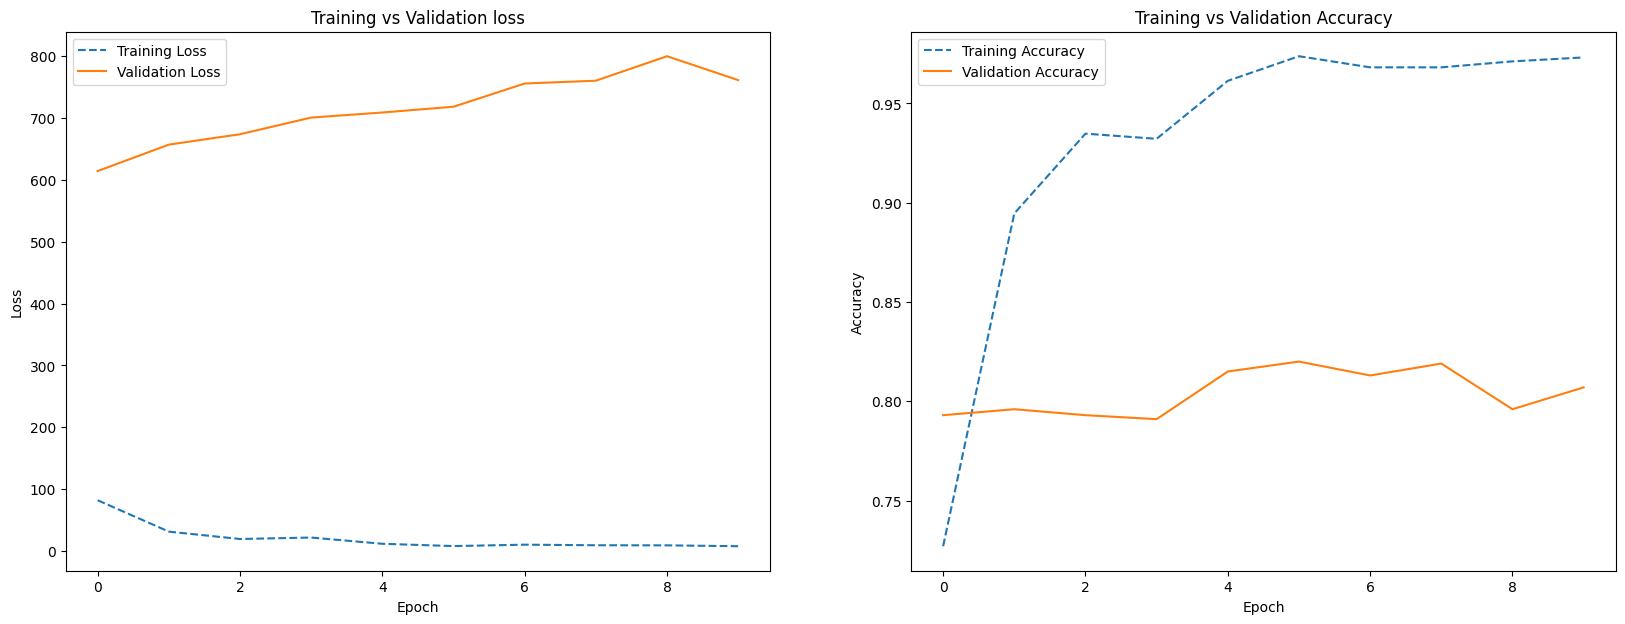

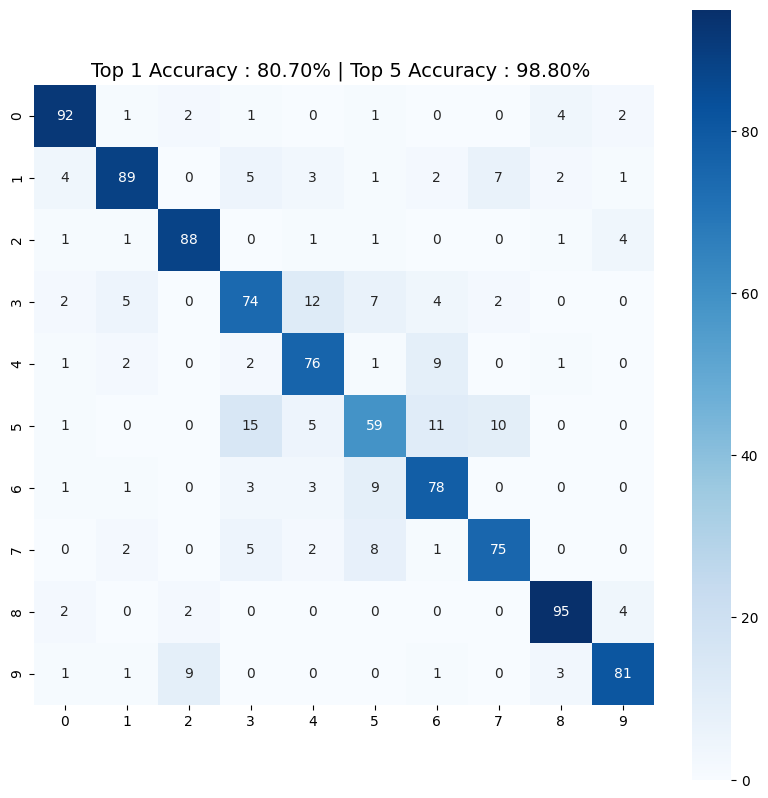

Top 1 Accuracy: 80.700%
Top 5 Accuracy: 98.8%
Classwise Accuracy Score: 
[0.89320388 0.78070175 0.90721649 0.69811321 0.82608696 0.58415842
 0.82105263 0.80645161 0.9223301  0.84375   ]
Selected optimizer :<class 'torch.optim.adagrad.Adagrad'>
Epoch: 1 	Training Loss: 57.339447, 	Test Loss: 391.216218,  	Training acc: 0.800400, 	Test acc: 0.866000, 
Epoch: 2 	Training Loss: 7.036367, 	Test Loss: 335.199594,  	Training acc: 0.986200, 	Test acc: 0.893000, 
Epoch: 3 	Training Loss: 2.061597, 	Test Loss: 334.692627,  	Training acc: 0.999400, 	Test acc: 0.892000, 
Epoch: 4 	Training Loss: 1.033667, 	Test Loss: 338.609815,  	Training acc: 1.000000, 	Test acc: 0.892000, 
Epoch: 5 	Training Loss: 0.771824, 	Test Loss: 341.696292,  	Training acc: 0.999800, 	Test acc: 0.889000, 
Epoch: 6 	Training Loss: 0.554433, 	Test Loss: 347.637147,  	Training acc: 1.000000, 	Test acc: 0.890000, 
Epoch: 7 	Training Loss: 0.439116, 	Test Loss: 349.825233,  	Training acc: 1.000000, 	Test acc: 0.892000, 
Epoch:

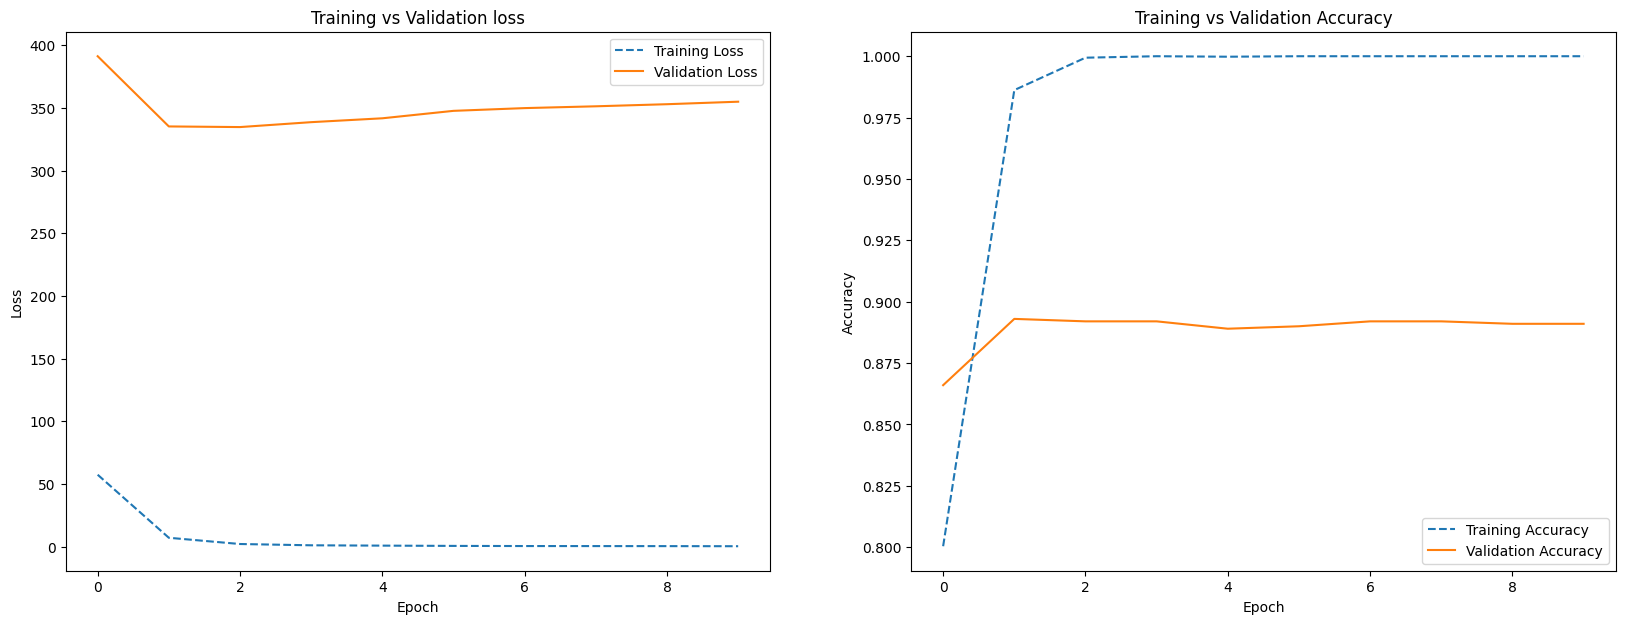

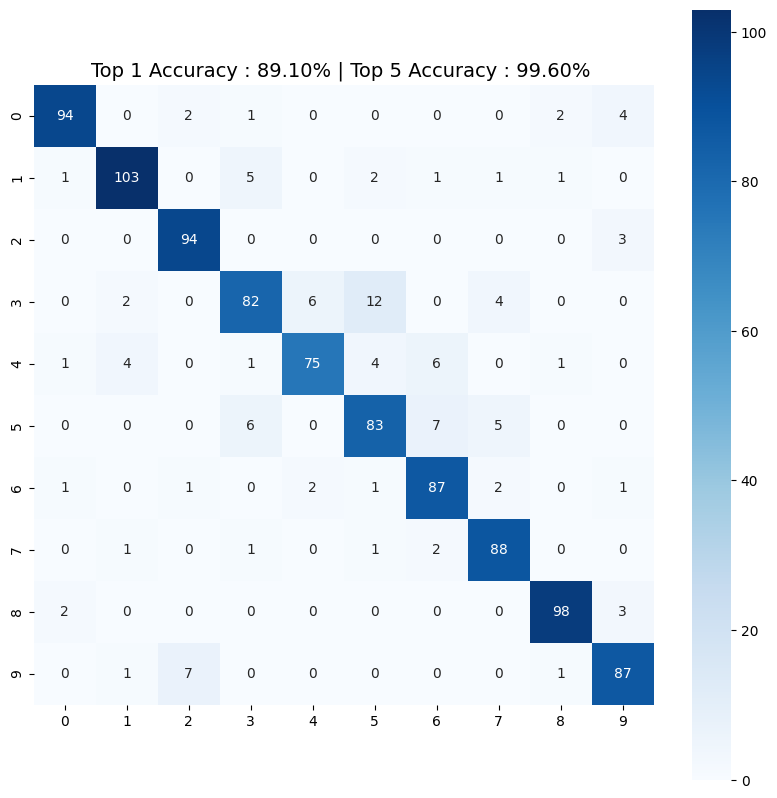

Top 1 Accuracy: 89.100%
Top 5 Accuracy: 99.6%
Classwise Accuracy Score: 
[0.91262136 0.90350877 0.96907216 0.77358491 0.81521739 0.82178218
 0.91578947 0.94623656 0.95145631 0.90625   ]
Selected optimizer :<class 'torch.optim.adadelta.Adadelta'>
Epoch: 1 	Training Loss: 256.169827, 	Test Loss: 2491.599083,  	Training acc: 0.088800, 	Test acc: 0.106000, 
Epoch: 2 	Training Loss: 234.733407, 	Test Loss: 2301.831961,  	Training acc: 0.150600, 	Test acc: 0.166000, 
Epoch: 3 	Training Loss: 215.314672, 	Test Loss: 2132.591963,  	Training acc: 0.234600, 	Test acc: 0.258000, 
Epoch: 4 	Training Loss: 198.007964, 	Test Loss: 1981.519461,  	Training acc: 0.313200, 	Test acc: 0.327000, 
Epoch: 5 	Training Loss: 183.040474, 	Test Loss: 1846.614122,  	Training acc: 0.390400, 	Test acc: 0.379000, 
Epoch: 6 	Training Loss: 169.069120, 	Test Loss: 1725.814939,  	Training acc: 0.466200, 	Test acc: 0.438000, 
Epoch: 7 	Training Loss: 157.340216, 	Test Loss: 1618.575931,  	Training acc: 0.525200, 	Test 

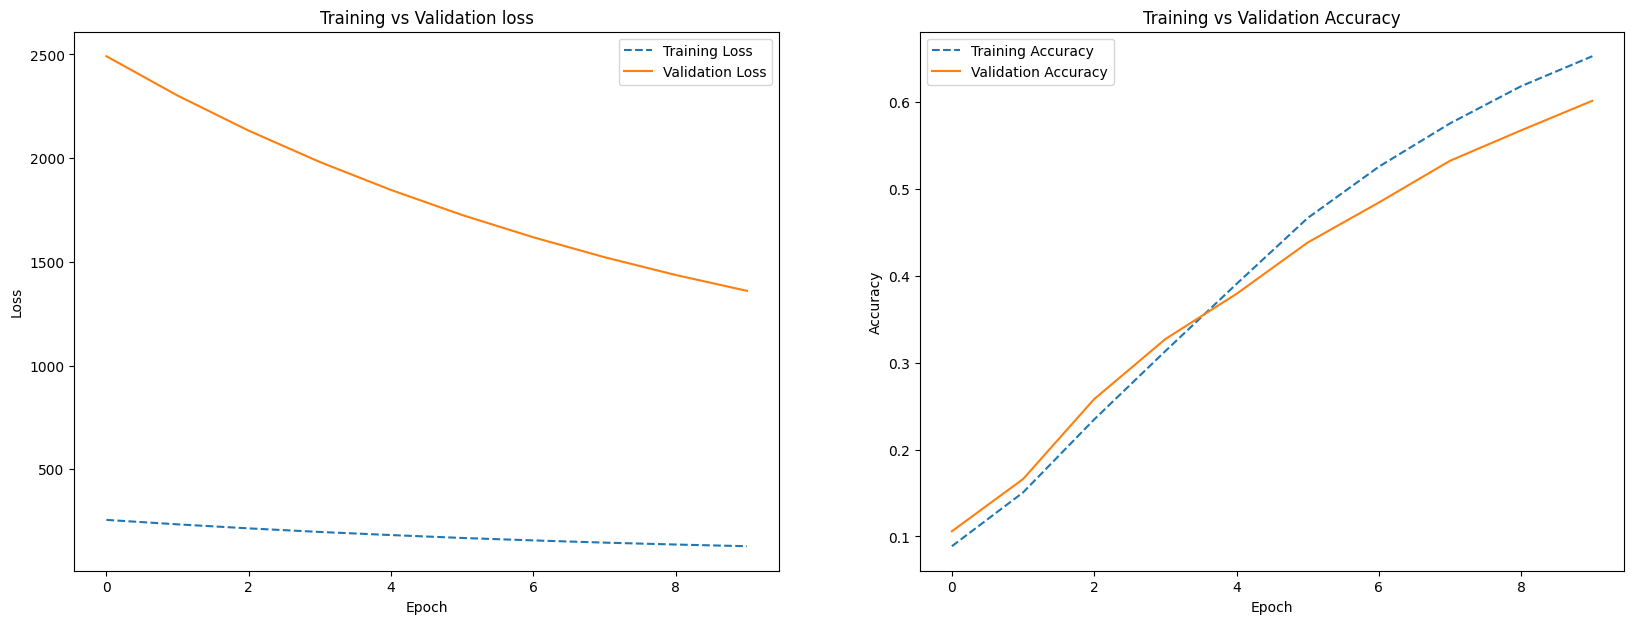

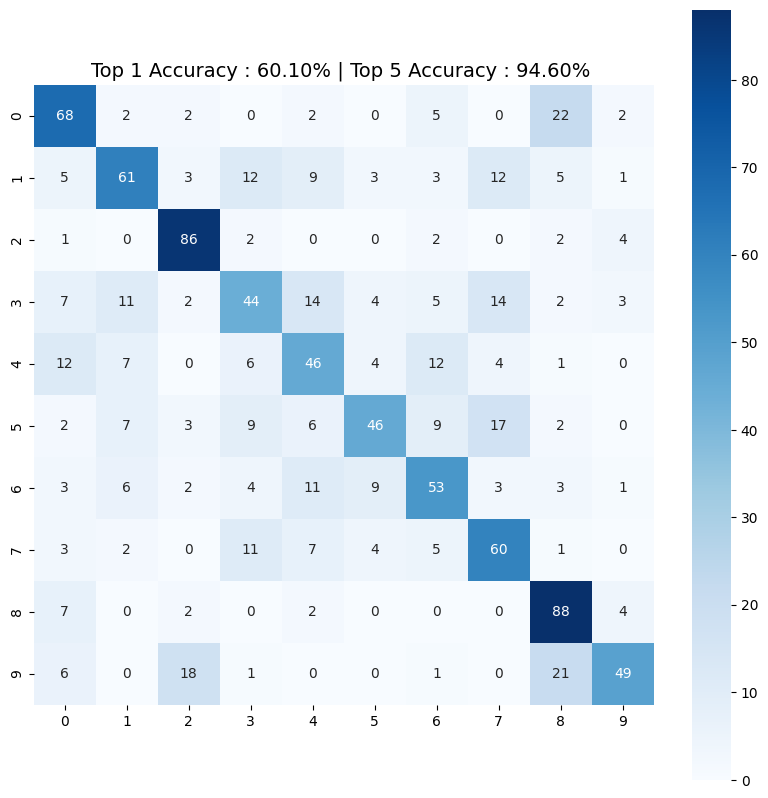

Top 1 Accuracy: 60.100%
Top 5 Accuracy: 94.6%
Classwise Accuracy Score: 
[0.66019417 0.53508772 0.88659794 0.41509434 0.5        0.45544554
 0.55789474 0.64516129 0.85436893 0.51041667]
Selected optimizer :<class 'torch.optim.rmsprop.RMSprop'>
Epoch: 1 	Training Loss: 221.198801, 	Test Loss: 1708.335161,  	Training acc: 0.255200, 	Test acc: 0.356000, 
Epoch: 2 	Training Loss: 152.504709, 	Test Loss: 1247.624278,  	Training acc: 0.436800, 	Test acc: 0.525000, 
Epoch: 3 	Training Loss: 120.680466, 	Test Loss: 1147.314548,  	Training acc: 0.559800, 	Test acc: 0.603000, 
Epoch: 4 	Training Loss: 94.099264, 	Test Loss: 1029.482007,  	Training acc: 0.671600, 	Test acc: 0.656000, 
Epoch: 5 	Training Loss: 73.839946, 	Test Loss: 881.439209,  	Training acc: 0.733200, 	Test acc: 0.693000, 
Epoch: 6 	Training Loss: 52.886699, 	Test Loss: 1070.078611,  	Training acc: 0.815600, 	Test acc: 0.664000, 
Epoch: 7 	Training Loss: 38.459189, 	Test Loss: 1022.760391,  	Training acc: 0.867800, 	Test acc: 0.

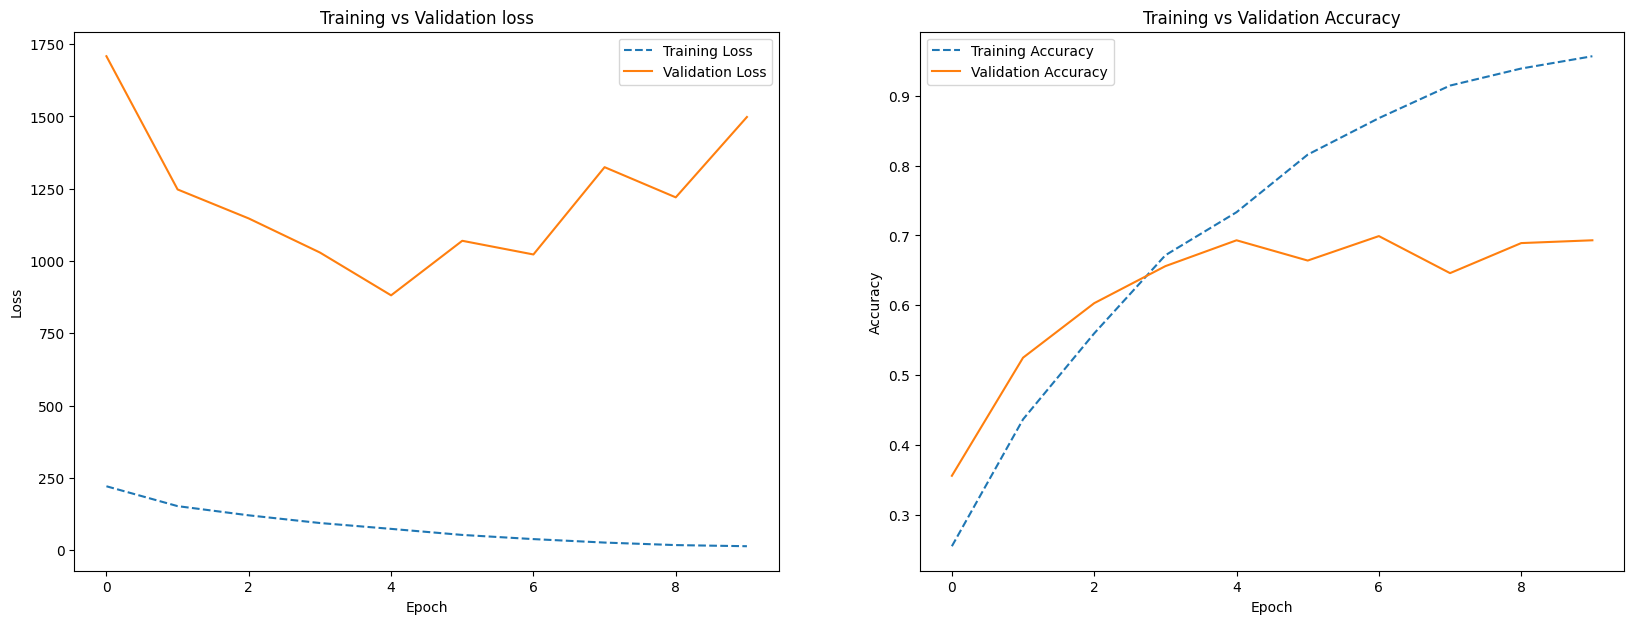

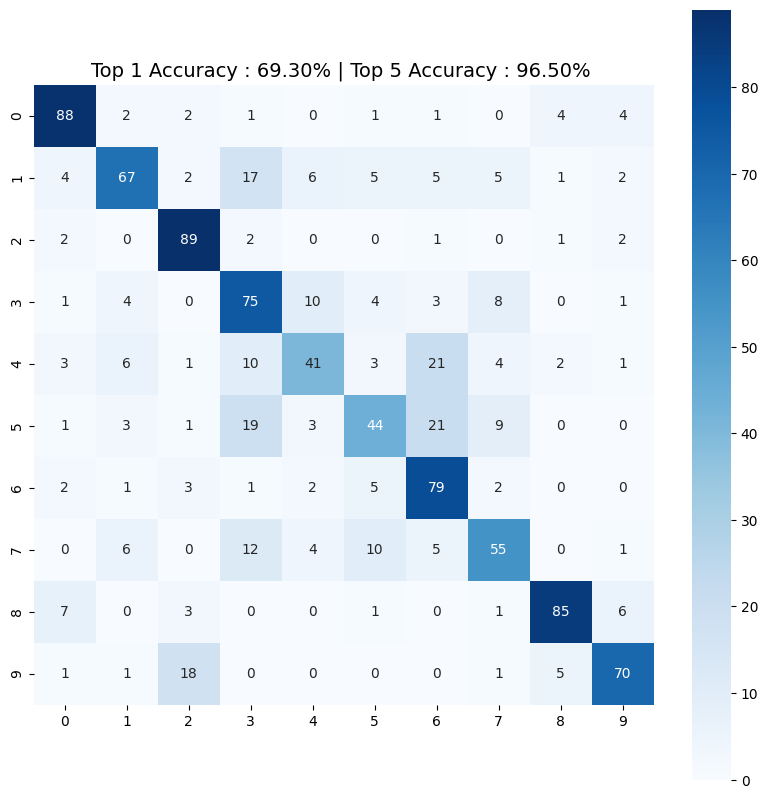

Top 1 Accuracy: 69.300%
Top 5 Accuracy: 96.5%
Classwise Accuracy Score: 
[0.85436893 0.5877193  0.91752577 0.70754717 0.44565217 0.43564356
 0.83157895 0.59139785 0.82524272 0.72916667]


In [35]:
selected_optimizers:list[torch.optim.Optimizer] = [torch.optim.Adam,torch.optim.Adagrad,torch.optim.Adadelta,torch.optim.RMSprop]

for optimizer in selected_optimizers:
    print(f'Selected optimizer :{optimizer}')
    # Load the pre-trained ResNet18 model
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    # Replace the final fully connected layer
    num_classes = 10
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    # Define the optimizer and loss function

    optimizer_inst =  optimizer(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    loss_list = model_training(model,criterion,optimizer_inst,trainloader,testloader,num_epochs=10)
    plot_training_graphs(loss_list)
    test_images, test_labels = next(iter(testloader))
    test_output = model(test_images)
    with torch.no_grad():
        confusionMatrixAndAccuracyReport(test_labels,test_output,testdataset.classes)